# 1.1 Install Dependencies and Setup

In [1]:
!pip3 install tensorflow opencv-python matplotlib

In [2]:
! pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aext_assistant                0.4.0
aext_assistant_server         0.4.0
aext_core                     0.4.0
aext_core_server              0.4.0
aext_shared                   0.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-b

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) #limit the momory need

# 1.2 Remove Dodgy Images

In [7]:
#this block helps to get rid of all the images with incorrect extensions,corrupted,etc
import cv2
import imghdr # helps in checking the image extension
from matplotlib import pyplot as plt

/var/folders/5p/hhhxmq492w94b6dtj06hg3rw0000gn/T/ipykernel_17173/1331796999.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr # helps in checking the image extension


In [8]:
data_dir = 'archive'

In [15]:
# files = os.listdir(data_dir)
# files

# # Check if there are files in the directory
# if files:
#     # Remove the second file in the list (index 1)
#     file_to_remove = os.path.join(data_dir, files[0])
#     os.remove(file_to_remove)
#     print(f"File '{file_to_remove}' removed successfully.")
# else:
#     print("No files in the directory.")


In [16]:
files

['test', 'train']

In [18]:
os.listdir(os.path.join(data_dir,'train','Benign')) #prints all the images in the Benigin folder

['63.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '2666.jpg',
 '5109.jpg',
 '2100.jpg',
 '4571.jpg',
 '1409.jpg',
 '189.jpg',
 '2114.jpg',
 '4565.jpg',
 '4203.jpg',
 '2672.jpg',
 '77.jpg',
 '837.jpg',
 '2882.jpg',
 '3544.jpg',
 '5135.jpg',
 '1353.jpg',
 '1435.jpg',
 '5653.jpg',
 '3222.jpg',
 '5647.jpg',
 '2128.jpg',
 '3236.jpg',
 '4559.jpg',
 '1421.jpg',
 '1347.jpg',
 '2896.jpg',
 '3550.jpg',
 '5121.jpg',
 '638.jpg',
 '5874.jpg',
 '5860.jpg',
 '2869.jpg',
 '1390.jpg',
 '604.jpg',
 '2699.jpg',
 '2841.jpg',
 '3587.jpg',
 '5848.jpg',
 '5690.jpg',
 '162.jpg',
 '176.jpg',
 '5684.jpg',
 '2855.jpg',
 '3593.jpg',
 '88.jpg',
 '610.jpg',
 '1384.jpg',
 '6164.jpg',
 '4773.jpg',
 '2302.jpg',
 '2464.jpg',
 '4015.jpg',
 '1179.jpg',
 '2470.jpg',
 '4001.jpg',
 '4767.jpg',
 '3008.jpg',
 '2316.jpg',
 '5479.jpg',
 '6170.jpg',
 '3020.jpg',
 '4997.jpg',
 '5451.jpg',
 '6158.jpg',
 '1637.jpg',
 '1151.jpg',
 '5337.jpg',
 '2458.jpg',
 '3746.jpg',
 '4029.jpg',
 '5323.jpg',
 '3752.jpg',
 '1145.jpg',
 '1623.jpg',


In [19]:
os.listdir(os.path.join(data_dir,'train','Malignant')) #prints all the images in the Malignant folder

['63.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '2666.jpg',
 '5109.jpg',
 '2100.jpg',
 '4571.jpg',
 '1409.jpg',
 '189.jpg',
 '2114.jpg',
 '4565.jpg',
 '4203.jpg',
 '2672.jpg',
 '77.jpg',
 '837.jpg',
 '2882.jpg',
 '3544.jpg',
 '5135.jpg',
 '1353.jpg',
 '1435.jpg',
 '3222.jpg',
 '2128.jpg',
 '3236.jpg',
 '4559.jpg',
 '1421.jpg',
 '1347.jpg',
 '2896.jpg',
 '3550.jpg',
 '5121.jpg',
 '638.jpg',
 '2869.jpg',
 '1390.jpg',
 '604.jpg',
 '2699.jpg',
 '2841.jpg',
 '3587.jpg',
 '162.jpg',
 '176.jpg',
 '2855.jpg',
 '3593.jpg',
 '88.jpg',
 '610.jpg',
 '1384.jpg',
 '4773.jpg',
 '2302.jpg',
 '2464.jpg',
 '4015.jpg',
 '1179.jpg',
 '2470.jpg',
 '4001.jpg',
 '4767.jpg',
 '3008.jpg',
 '2316.jpg',
 '5479.jpg',
 '3020.jpg',
 '4997.jpg',
 '5451.jpg',
 '1637.jpg',
 '1151.jpg',
 '5337.jpg',
 '2458.jpg',
 '3746.jpg',
 '4029.jpg',
 '5323.jpg',
 '3752.jpg',
 '1145.jpg',
 '1623.jpg',
 '3034.jpg',
 '4983.jpg',
 '5445.jpg',
 '4968.jpg',
 '1810.jpg',
 '3961.jpg',
 '3975.jpg',
 '1804.jpg',
 '348.jpg',
 '360.jpg',
 '

In [20]:
image_exts = ['jpeg','jpg','bmp','png']

In [21]:
img = cv2.imread(os.path.join('archive','train','Benign','63.jpg')) 


In [22]:
img #its a numpy array

array([[[172, 152, 227],
        [170, 150, 225],
        [168, 147, 222],
        ...,
        [188, 164, 228],
        [186, 162, 226],
        [184, 160, 224]],

       [[171, 151, 226],
        [169, 149, 224],
        [168, 147, 222],
        ...,
        [187, 163, 227],
        [186, 162, 226],
        [186, 162, 226]],

       [[170, 150, 225],
        [168, 148, 223],
        [168, 147, 222],
        ...,
        [185, 161, 225],
        [187, 163, 227],
        [189, 165, 229]],

       ...,

       [[152, 146, 205],
        [152, 146, 205],
        [153, 147, 206],
        ...,
        [165, 150, 211],
        [167, 152, 213],
        [168, 153, 214]],

       [[150, 144, 203],
        [151, 145, 204],
        [153, 147, 206],
        ...,
        [164, 149, 210],
        [166, 151, 212],
        [167, 152, 213]],

       [[149, 143, 202],
        [151, 145, 204],
        [153, 147, 206],
        ...,
        [167, 152, 213],
        [168, 153, 214],
        [169, 154, 215]]

In [23]:
img.shape # 3 shows colored image

(224, 224, 3)

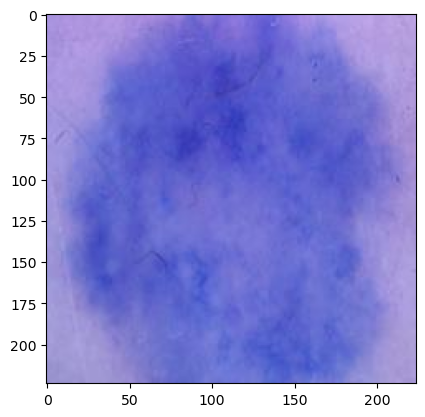

In [24]:
plt.imshow(img)

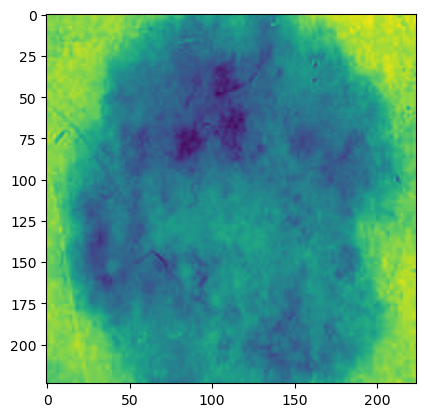

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)) #this statement fix the color
plt.show()

In [26]:
files = os.listdir(data_dir)
# if files:
#     # Remove the second file in the list (index 1)
#     file_to_remove = os.path.join(data_dir, files[0])
#     os.remove(file_to_remove)
#     print(f"File '{file_to_remove}' removed successfully.")
# else:
#     print("No files in the directory.")

In [27]:
files

['test', 'train']

In [29]:
os.listdir(os.path.join(data_dir,'train'))

['.DS_Store', 'Malignant', 'Benign']

In [31]:
files2 = os.listdir(os.path.join(data_dir,'train'))
if files2:
    # Remove the second file in the list (index 1)
    file_to_remove = os.path.join(data_dir,'train', files2[0])
    os.remove(file_to_remove)
    print(f"File '{file_to_remove}' removed successfully.")
else:
    print("No files in the directory.")

File 'archive/train/.DS_Store' removed successfully.


In [32]:
os.listdir(os.path.join(data_dir,'train'))

['Malignant', 'Benign']

In [34]:
for image_class in os.listdir(os.path.join(data_dir,'train')):
    for image in os.listdir(os.path.join(data_dir,'train',image_class)):
        image_path = os.path.join(data_dir,'train',image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

# 1.3 Load Data

In [35]:
tf.data.Dataset #tensorflow has a dataset api-> this allows you to do datapipeline which allows u to scale on much larger datasets but it also gives u a repeatable set of data that u are going to apply on your data

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [202]:
#tf.data.Dataset.list_files #helps in wildcard search

In [36]:
import numpy as np

In [204]:
# tf.keras.utils.image_dataset_from_directory??

In [37]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir,'train')) #keras have a data pipeline direct function or helper built into it

Found 11879 files belonging to 2 classes.


In [38]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
data_iterator = data.as_numpy_iterator()

In [40]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x30c779e50>)

In [41]:
batch = data_iterator.next()

In [210]:
batch

2024-05-06 12:02:00.356805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.  

2024-05-06 12:02:00.403176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [42]:
type(batch)

tuple

In [43]:
len(batch)

2

In [44]:
#images represented as numpy array
batch[0].shape #return (batchSize,image_size,tells pic is colored or not) imageSize = (256,256)

(32, 256, 256, 3)

In [45]:
batch[1]  #here 1 represent either happy or sad //ly 0 will do

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

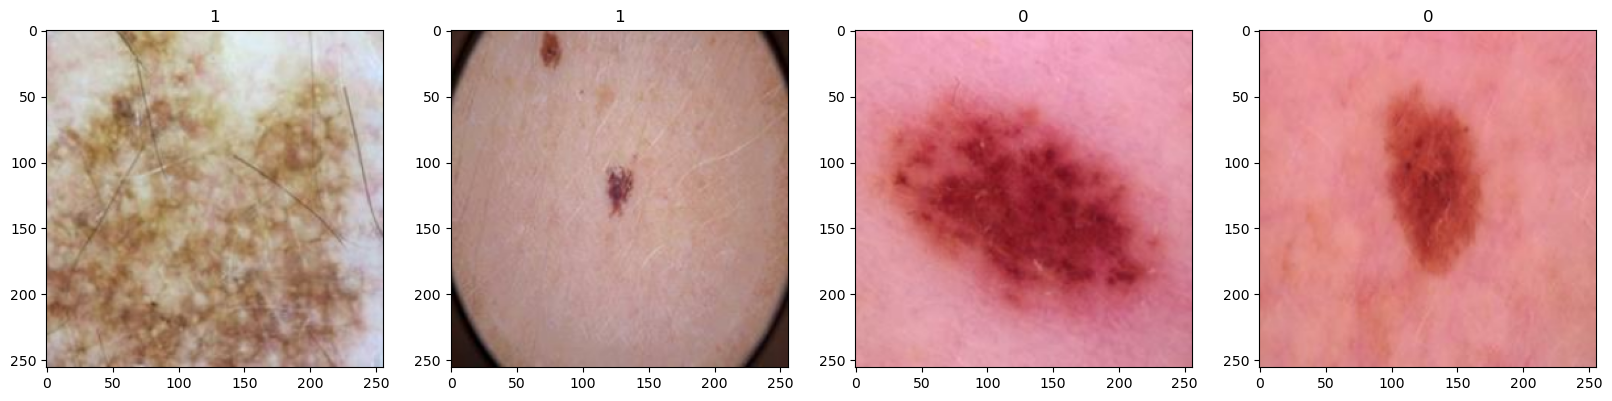

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img.astype(int))
    ax[idx]. title.set_text(batch[1][idx])
    
    # this tells that 1 represents Malignant and 0 represents Benign

In [47]:
print(batch[0].min())
print(batch[0].max())
# in preprocessing we will reduce the range from 0 to 255 -> 0 to 1(in deep learing model its good for data to be as small as possible)

0.0
255.0


In [48]:
scaled = batch[0]/255

In [49]:
print(scaled.min())
print(scaled.max())

0.0
1.0


# 2 Preprocess Data

## 2.1 Scale data

In [50]:
# scaling data using capability of data pipelining -> this a transformation step on data pipeline
data = data.map(lambda x,y: (x/255,y)) #here x-> images (scaling done from 0-255 to 0-1) and y has no transformation

In [51]:
scaled_iterator = data.as_numpy_iterator()

In [52]:
batch = scaled_iterator.next()

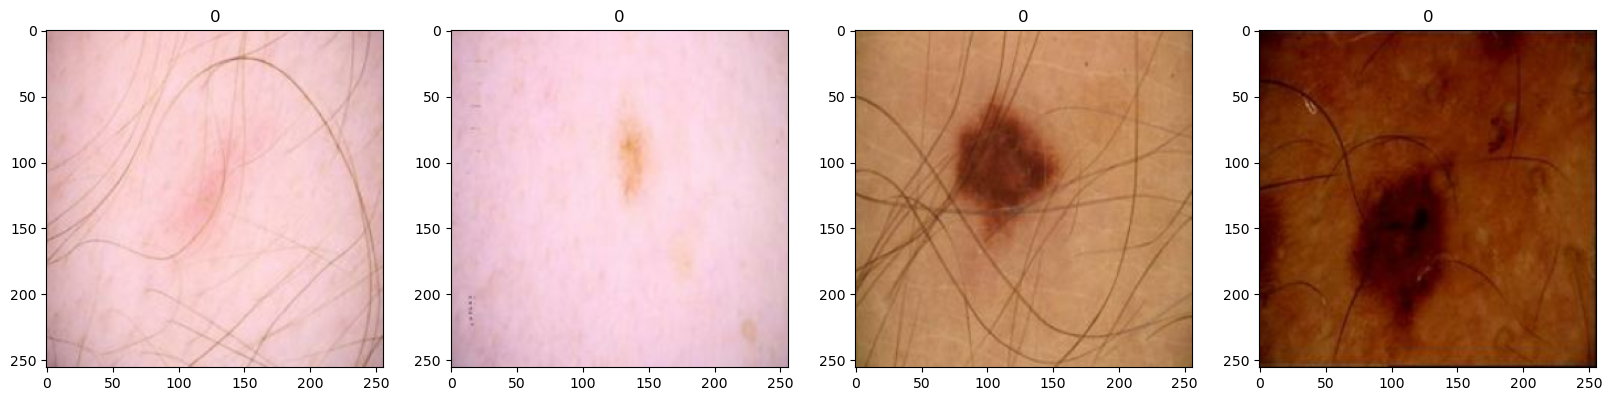

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img)
    ax[idx]. title.set_text(batch[1][idx])

## 2.2 Split data

In [54]:
len(data)

372

In [55]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [56]:
train_size+val_size+test_size

373

In [57]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [58]:
len(train)

260

In [59]:
len(val)

75

In [60]:
len(test)

37

# Deep Model

## 3.1 Building deep learning model

In [61]:
# model building api in keras and tensorflow is -> sequential(great for one data input and one data output),functional api(multiple inputs and multiple outputs)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add (MaxPooling2D())

model.add(Flatten ())
model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

/Users/mananmehra/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [66]:
logdir = 'logs3'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 68s 258ms/step - accuracy: 0.7152 - loss: 0.5582 - val_accuracy: 0.8233 - val_loss: 0.3933
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 66s 255ms/step - accuracy: 0.8307 - loss: 0.3926 - val_accuracy: 0.8450 - val_loss: 0.3565
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 69s 265ms/step - accuracy: 0.8424 - loss: 0.3593 - val_accuracy: 0.8579 - val_loss: 0.3339
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 69s 263ms/step - accuracy: 0.8441 - loss: 0.3571 - val_accuracy: 0.8275 - val_loss: 0.4175
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 73s 279ms/step - accuracy: 0.8507 - loss: 0.3442 - val_accuracy: 0.8525 - val_loss: 0.3413
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 76s 292ms/step - accuracy: 0.8563 - loss: 0.3217 - val_accuracy: 0.8608 - val_loss: 0.3243
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 82s 316ms/step - accuracy: 0.8624 - loss: 0.3128 - val_accuracy: 0.8679 - val_loss: 0.3193
Epoch 8/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 82s 313ms/step - accuracy: 0.8694 - loss: 0

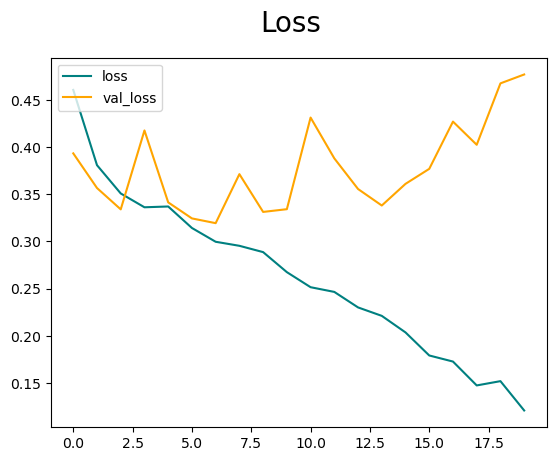

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label= 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label= 'val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [71]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy #classification

In [72]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    X,y =batch   # X - images y-true value
    yhat = model. predict(X)
    pre.update_state(y, yhat)
    re. update_state (y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━

2024-08-22 16:17:31.541820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [74]:
print(f'Precison:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precison:0.8361486196517944,Recall:0.8730158805847168,Accuracy:0.854184627532959


## 4.2 Test 

In [75]:
import cv2

In [86]:
img = cv2.imread(os.path.join(data_dir,'test','Benign','6304.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)) #this statement fix the color
plt.show()

In [87]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt. show()

In [88]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [89]:
yhat

array([[0.00232889]], dtype=float32)

In [90]:
if yhat>0.50:
    print("person is not having melanoma")
else:
    print("person is having melanoma")

person is having melanoma


# 5. Save the Model

In [91]:
from tensorflow.keras.models import load_model

In [92]:
model.save(os.path.join('models','melanoma.h5'))

In [93]:
new_model = load_model(os.path.join('models','melanoma.h5'))

In [94]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [96]:
if yhat_new>0.50:
    print("person is not having melanoma")
else:
    print("person is having melanoma")

person is having melanoma


# 6. Applying XAI 

In [97]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aext_assistant                0.4.0
aext_assistant_server         0.4.0
aext_core                     0.4.0
aext_core_server              0.4.0
aext_shared                   0.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-b

In [98]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=07629fffc90c1de192d4165cb25d4a6eeadf456b1ccfc773a65028034d354563
  Stored in directory: /Users/mananmehra/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction probabilities: [0.988343]
The model predicts the image is cancerous.


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

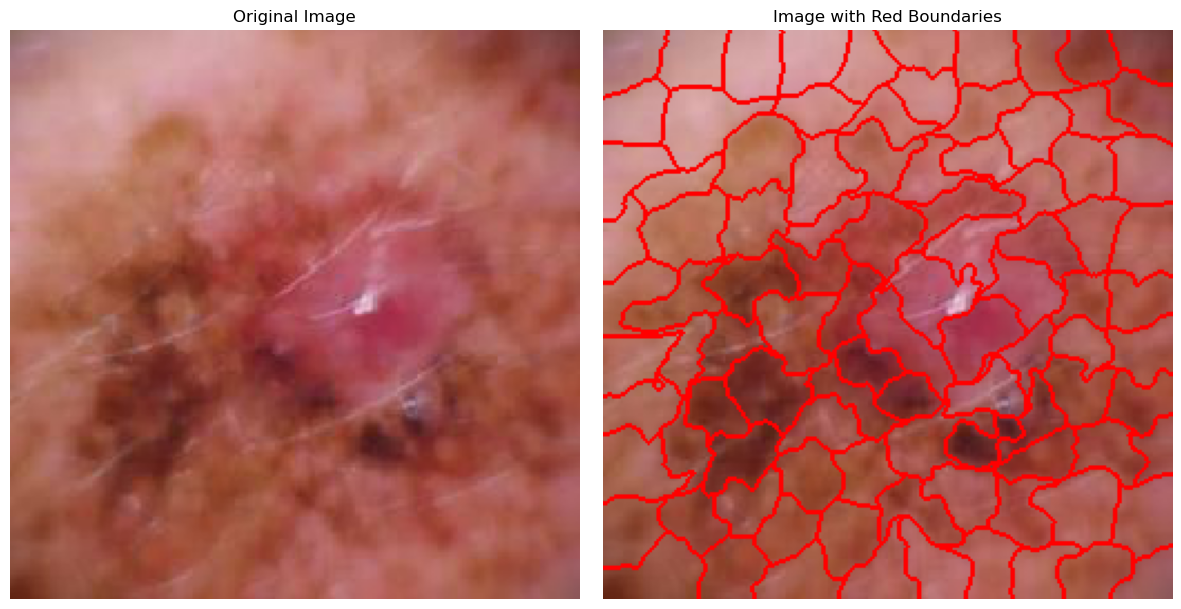

In [107]:
from lime import lime_image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model(os.path.join('models','melanoma.h5'))

# Define a prediction function for LIME
def predict_fn(images):
    preds = model.predict(images)
    return preds

# Initialize LIME
explainer = lime_image.LimeImageExplainer()

# Load and preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# Predict if the image is cancerous
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    preds = model.predict(img_array)
    # preds[0] gives the probability of the positive class
    is_cancerous = preds[0] > 0.5
    return is_cancerous, preds

# Function to generate textual reasons based on LIME explanation
def get_textual_reasons(explanation, label):
    # Check available labels in the explanation
    available_labels = list(explanation.local_exp.keys())
    print(f"Available labels in explanation: {available_labels}")

    if label not in available_labels:
        print(f"Label {label} not found in explanation. Using label {available_labels[0]} instead.")
        label = available_labels[0]

    # Get the explanation for the given label
    temp, mask = explanation.get_image_and_mask(
        label=label,
        positive_only=True,
        num_features=5,
        hide_rest=False
    )
    
    # Get feature contributions from the explanation
    feature_importances = explanation.local_exp[label]
    
    feature_descriptions = []
    
    for i, (feature, weight) in enumerate(feature_importances):
        if weight > 0:
            feature_descriptions.append(f"Feature {i+1}: Contributes positively with a weight of {weight:.4f}. This segment may show characteristics indicative of melanoma.")
        else:
            feature_descriptions.append(f"Feature {i+1}: Contributes negatively with a weight of {weight:.4f}. This segment may not show typical features of melanoma.")
    
    # Add medical context
    medical_explanation = "Based on the features highlighted by LIME:\n"
    if np.any(mask):
        medical_explanation += "- Melanomas often present as asymmetrical lesions with irregular borders.\n"
        medical_explanation += "- Color variation within the lesion is a common sign.\n"
        medical_explanation += "- The highlighted areas correspond to these typical characteristics.\n"
    else:
        medical_explanation += "No significant melanoma features were highlighted by the model.\n"
        medical_explanation += "The model did not detect clear signs of melanoma based on the image. Further clinical evaluation is recommended.\n"

    return "\n".join(feature_descriptions) + "\n\n" + medical_explanation


# Preprocess image for segmentation
def preprocess_for_segmentation(image_path):
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    return img_array

# Segment the image using SLIC (Simple Linear Iterative Clustering)
def segment_image(image):
    segments = slic(image, n_segments=100, compactness=10, sigma=1)
    return segments

# Overlay boundaries on the original image
def overlay_boundaries(image, segments):
    boundaries = mark_boundaries(image, segments, color=(1, 0, 0), mode='thick')
    return boundaries

# Main process
image_path = os.path.join('archive','test','Malignant','5602.jpg')

# Check if the image is cancerous
is_cancerous, preds = predict_image(image_path)

# Display prediction probabilities
print(f"Prediction probabilities: {preds[0]}")

if is_cancerous:
    print("The model predicts the image is cancerous.")
    
    # Explain the instance
    img_array = preprocess_image(image_path)
    explanation = explainer.explain_instance(
        img_array[0],
        predict_fn,
        top_labels=2,
        hide_color=0,
        num_samples=1000
    )

    # Use the function to get textual reasons
    label = 1  # Label for cancerous class
    textual_reasons = get_textual_reasons(explanation, label)
    print(textual_reasons)

else:
    print("The model predicts the image is not cancerous.")
    print("The model did not detect significant signs of cancerous features based on the image.")

# Preprocess image for segmentation
image_for_segmentation = preprocess_for_segmentation(image_path)

# Segment the image
segments = segment_image(image_for_segmentation)

# Overlay boundaries
boundaries = overlay_boundaries(image_for_segmentation, segments)

# Display the original image with boundaries
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_for_segmentation)
plt.axis('off')
plt.title('Original Image')

# Display the image with red boundaries
plt.subplot(1, 2, 2)
plt.imshow(boundaries)
plt.axis('off')
plt.title('Image with Red Boundaries')

plt.tight_layout()
plt.show()